In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Data Preprocessing

In [2]:
data = pd.read_csv('corona_dataset.csv')
data.head()


,people_ID,Region,Gender,Designation,Name,Married,Children,Occupation,Mode_transport,cases/1M,...,HBB,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,Insurance,salary,FT/month,Infect_Prob
0,1,Bhubaneshwar,Female,Mrs,mansi,YES,1.0,Farmer,Public,2,...,93.0,233.0,82.0,58.0,27,7,3600000.0,1300000,2.0,49.135010
1,2,Bhubaneshwar,Female,Mrs,riya masi,YES,2.0,Farmer,Walk,2,...,56.0,328.0,89.0,68.0,5,6,1600000.0,400000,1.0,51.147880
2,3,Bhubaneshwar,Female,Mrs,sunita,NO,1.0,Cleaner,Public,2,...,137.0,213.0,77.0,43.0,40,6,3400000.0,900000,1.0,73.224000
3,4,Bhubaneshwar,Female,Mrs,anjali @ babli,YES,1.0,Driver,Car,2,...,167.0,275.0,64.0,60.0,27,7,700000.0,2300000,1.0,48.779225
4,5,Bhubaneshwar,Female,Mrs,champa karketta,NO,2.0,Manufacturing,Car,2,...,153.0,331.0,71.0,64.0,32,7,3200000.0,1100000,1.0,87.868800


In [3]:
""" 
perfrom data preprocessing on 'data' Dataframe
The final dataframe must be named data
eg .... data =  {preprocessed data}    
"""
data.dropna(axis = 0,inplace = True) #Dropping any row with nan

In [4]:
data_copy  = data.drop(['people_ID', 'Designation','Name','Married'],axis = 1) #Dropping insignificant columns

In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()  #instantiationg label encoder object

In [6]:
#label encoding the columns with string data in the copy of original data 
data_copy['Region'] = le.fit_transform(data['Region']) 
data_copy['Gender'] = le.fit_transform(data['Gender'])
data_copy['Occupation'] = le.fit_transform(data['Occupation'])
data_copy['Mode_transport'] = le.fit_transform(data['Mode_transport'])
data_copy['comorbidity'] = le.fit_transform(data['comorbidity']) 
data_copy['Pulmonary score'] = le.fit_transform(data['Pulmonary score'])

In [7]:
#finding correlation to determine the significatnt columns
data_copy.corr()

,Region,Gender,Children,Occupation,Mode_transport,cases/1M,Deaths/1M,comorbidity,Age,Coma score,...,HBB,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,Insurance,salary,FT/month,Infect_Prob
Region,1.000000,-0.008273,0.071655,0.002609,0.000553,-0.766191,-0.676677,0.019143,-0.028768,0.032324,...,0.025108,-0.014687,-0.049648,0.028782,-0.013958,-0.001280,-0.015868,-0.017037,0.010421,-0.090245
Gender,-0.008273,1.000000,0.010441,0.018880,-0.007475,0.003507,0.004312,-0.012330,-0.020019,0.011138,...,0.012539,0.000613,0.006844,0.025263,0.018559,0.002377,0.000778,0.003689,0.009690,-0.003512
Children,0.071655,0.010441,1.000000,0.011807,0.016270,-0.001630,0.007234,-0.001304,-0.531586,0.031881,...,0.003458,0.000974,-0.001516,0.011196,-0.013524,-0.002719,0.004547,-0.022095,0.004863,0.308913
Occupation,0.002609,0.018880,0.011807,1.000000,-0.005955,-0.008693,-0.011262,0.002234,0.014257,-0.011753,...,0.017948,-0.010588,-0.006353,-0.017643,0.003003,-0.009599,0.002997,0.004783,-0.005776,0.014052
Mode_transport,0.000553,-0.007475,0.016270,-0.005955,1.000000,-0.012721,-0.015920,-0.001748,-0.017849,-0.008794,...,-0.012874,-0.006825,-0.006298,0.005030,-0.001261,0.013749,0.006944,0.005839,-0.002756,-0.004549
cases/1M,-0.766191,0.003507,-0.001630,-0.008693,-0.012721,1.000000,0.987841,-0.011033,-0.011338,-0.013425,...,-0.003043,0.006652,0.021365,0.002496,0.005683,-0.003099,0.022042,0.004121,0.000431,0.157053
Deaths/1M,-0.676677,0.004312,0.007234,-0.011262,-0.015920,0.987841,1.000000,-0.009745,-0.016045,-0.009308,...,0.000807,0.004264,0.017396,0.005809,0.003709,-0.003250,0.020154,0.003150,0.002906,0.160011
comorbidity,0.019143,-0.012330,-0.001304,0.002234,-0.001748,-0.011033,-0.009745,1.000000,-0.004525,-0.008875,...,-0.010611,0.004271,-0.002111,-0.017735,-0.002808,0.009112,-0.003661,-0.003061,-0.015824,0.001913
Age,-0.028768,-0.020019,-0.531586,0.014257,-0.017849,-0.011338,-0.016045,-0.004525,1.000000,-0.024256,...,0.001642,-0.014468,0.005810,-0.005244,0.011174,-0.000205,-0.014358,0.005719,0.003430,-0.408445
Coma score,0.032324,0.011138,0.031881,-0.011753,-0.008794,-0.013425,-0.009308,-0.008875,-0.024256,1.000000,...,0.009950,-0.005894,-0.011524,0.003113,-0.017476,0.030163,-0.011778,0.002740,0.007087,0.061599


In [8]:
#with reference to the correlation table above the following are dropped in the main data
data.drop(['people_ID', 'Designation','Name','Married','Gender','Occupation','comorbidity','Pulmonary score','cardiological pressure','Heart rate','Blood Glucose','FT/month'],axis = 1,inplace = True)

In [9]:
data.head() #the data with only significant column entries

,Region,Children,Mode_transport,cases/1M,Deaths/1M,Age,Coma score,Diuresis,Platelets,HBB,d-dimer,HDL cholesterol,Charlson Index,Insurance,salary,Infect_Prob
0,Bhubaneshwar,1.0,Public,2,0,68,8,441.0,154.0,93.0,233.0,58.0,27,3600000.0,1300000,49.135010
2,Bhubaneshwar,1.0,Public,2,0,19,13,416.0,124.0,137.0,213.0,43.0,40,3400000.0,900000,73.224000
3,Bhubaneshwar,1.0,Car,2,0,33,9,410.0,98.0,167.0,275.0,60.0,27,700000.0,2300000,48.779225
4,Bhubaneshwar,2.0,Car,2,0,23,7,390.0,21.0,153.0,331.0,64.0,32,3200000.0,1100000,87.868800
5,Bhubaneshwar,1.0,Public,2,0,35,9,389.0,139.0,86.0,216.0,38.0,5,4600000.0,1900000,49.518345


In [10]:
#encoding of the columns with string entries
region = pd.get_dummies(data['Region'])
transport = pd.get_dummies(data['Mode_transport'])

In [11]:
#dropping one of the dummy columns in each dummy variable to avoid dummy variable trap
region.drop('Bhubaneshwar',axis = 1, inplace = True)
transport.drop('Public',axis = 1, inplace = True)

In [12]:
#dropping original columns with string entries and replacing them with their dummy columns
data.drop(['Region','Mode_transport'], axis = 1, inplace = True)
data = pd.concat([region,transport,data],axis = 1, sort =False)

In [13]:
#final data head
data.head()

,Bengaluru,Chandigarh,Chennai,Delhi,Car,Walk,Children,cases/1M,Deaths/1M,Age,Coma score,Diuresis,Platelets,HBB,d-dimer,HDL cholesterol,Charlson Index,Insurance,salary,Infect_Prob
0,0,0,0,0,0,0,1.0,2,0,68,8,441.0,154.0,93.0,233.0,58.0,27,3600000.0,1300000,49.135010
2,0,0,0,0,0,0,1.0,2,0,19,13,416.0,124.0,137.0,213.0,43.0,40,3400000.0,900000,73.224000
3,0,0,0,0,1,0,1.0,2,0,33,9,410.0,98.0,167.0,275.0,60.0,27,700000.0,2300000,48.779225
4,0,0,0,0,1,0,2.0,2,0,23,7,390.0,21.0,153.0,331.0,64.0,32,3200000.0,1100000,87.868800
5,0,0,0,0,0,0,1.0,2,0,35,9,389.0,139.0,86.0,216.0,38.0,5,4600000.0,1900000,49.518345


In [14]:
""" separating features and target """

Y = data['Infect_Prob']
X = data.drop(['Infect_Prob'],axis=1)

In [15]:
from sklearn.model_selection import train_test_split

train_X,test_X,train_Y,test_Y = train_test_split(X,Y)

print("Training Size : ",train_X.shape)
print("Testing Size : ",test_X.shape)

Training Size :  (5082, 19)
Testing Size :  (1695, 19)


### Regression to predict the probability of Corona Infection

In [16]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()

In [17]:
""" regression works with numeric values,
make sure you map all the string values in the data to some numeric value if required
"""

regressor.fit(train_X,train_Y)

C:\Users\Nikhil kr Parashar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

### Performance evaluation

In [18]:
""" complete the function RMSE 
    
    The Root Mean Square Error is defined in the following way
    sqrt(summation((y_pred[i]-y_true[i])^2)/N)
    where:
         i varies from 0 to N
         
    (use numpy)     

"""

def RMSE(y_pred,y_true):
    diff = np.subtract(y_pred,y_true)
    sq_diff = diff*diff
    n = len(sq_diff)
    sum_sq = np.sum(sq_diff)
    mse = sum_sq/n
    rmse = np.sqrt(mse)
    # return rmse
    
    return rmse
    
    

y_pred = regressor.predict(test_X)

print("Root Mean Square Error = ",RMSE(y_pred,test_Y))

Root Mean Square Error =  9.563311617456709


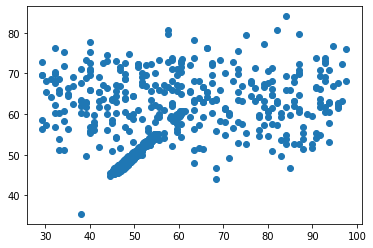

In [19]:
plt.scatter(test_Y,y_pred) #scatter plot for the regression model

# BONUS

In [28]:
"""
Using matplotlib to visualize the
total number of cases for
various occupations

"""
df = pd.read_csv('corona_dataset.csv')
df.dropna(axis = 0, inplace = True)
#creating a tuple of all the occupations
occ = tuple(df['Occupation'].unique())

In [29]:
#creating a list for total infected persons for each occupation
infected = []
for i in occ:
    infected.append(sum((df['Infect_Prob']>75)&(df['Occupation']==i)))

In [30]:
occ

('Farmer',
 'Cleaner',
 'Driver',
 'Manufacturing',
 'Clerk',
 'Business',
 'Sales',
 'Researcher',
 'Legal')

In [31]:
infected

[36, 44, 61, 54, 50, 48, 53, 61, 46]

In [32]:
y_pos = np.arange(len(occ))

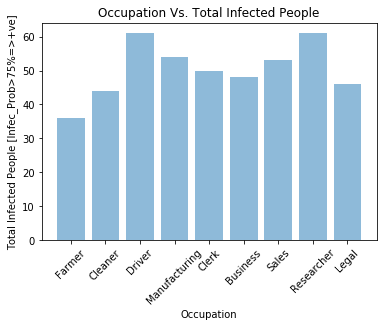

In [33]:
#creating a bar plot
plt.bar(y_pos, infected, align = 'center', alpha = 0.5)
plt.xticks(y_pos, occ, rotation = 45)
plt.xlabel('Occupation')
plt.ylabel('Total Infected People [Infec_Prob>75%=>+ve]')
plt.title('Occupation Vs. Total Infected People')
plt.show()

In [34]:
"""

Correlation of Diuresis with Infect_Prob using numpy

"""

d = df['Diuresis']
i = df['Infect_Prob']

In [35]:
#calculating the mean
d_mean = np.mean(d)
i_mean = np.mean(i)

In [36]:
#calculating the standard deviation
d_std = np.std(d)
i_std = np.std(i)

In [37]:
a = np.sum((d-d_mean)*(i-i_mean))

In [39]:
b = a/(d_std*i_std)

In [40]:
n = len(df)

In [41]:
cor = b/(n-1)

In [42]:
cor #the correlation between Diuresis and Infect_Prob

0.01967960897860137